In [1]:
import pandas as pd
import numpy as np

#### Preparing train dataset

In [2]:
#Evyatar
Evyatar_Spontan, Evyatar_Sync, Evyatar_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv")

#Nofar
Nofar_Spontan, Nofar_Sync, Nofar_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv")

#Oriya
Oriya_Spontan, Oriya_Sync, Oriya_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Oriya Social_Nuero\Oriya636759805268396661Alone.csv")

#Orya
Orya_Spontan, Orya_Sync, Orya_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv")

#Revital
Revital_Spontan, Revital_Sync, Revital_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Revital Marbel\Revital636770957038873193Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Revital Marbel\Revital636770957894370062Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Revital Marbel\Revital636770955999435879Alone.csv")

#Shahar
Shahar_Spontan, Shahar_Sync, Shahar_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shahar Terner\Sachar636771045591258071Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shahar Terner\Sachar636771046527112972Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shahar Terner\Sachar636771047408504303Alone.csv")

#Shelly
Shelly_Spontan, Shelly_Sync, Shelly_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv")

#Yael
Yael_Spontan, Yael_Sync, Yael_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yael Hagai\Yael636771059544754823Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yael Hagai\Yael636771060699529085Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yael Hagai\Yael636771061659067649Alone.csv")

#Yoel
Yoel_Spontan, Yoel_Sync, Yoel_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yoel Raz\Yoel636760921663075813Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yoel Raz\Yoel636760923490742912Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Training\Yoel Raz\Yoel636760922573364655Alone.csv")

In [3]:
list_sp = [Evyatar_Spontan, Nofar_Spontan, Oriya_Spontan, Orya_Spontan, Revital_Spontan, Shahar_Spontan, Shelly_Spontan, Yael_Spontan, Yoel_Spontan]
list_sy = [Evyatar_Sync, Nofar_Sync, Oriya_Sync, Orya_Sync, Revital_Sync, Shahar_Sync, Shelly_Sync, Yael_Sync, Yoel_Sync]
list_a = [Evyatar_Alone, Nofar_Alone, Oriya_Alone, Orya_Alone, Revital_Alone, Shahar_Alone, Shelly_Alone, Yael_Alone, Yoel_Alone]

In [4]:
for i in range(9):
    list_sp[i].insert(loc=1, column = 'label', value = 0)
    list_sy[i].insert(loc=1, column = 'label', value = 1)
    list_a[i].insert(loc=1, column = 'label', value = 2)

In [5]:
def create_df(l):
    new_l = l.copy()
    for i in range(len(new_l)):
        df = new_l[i]
        
        unallowed_time = df["Time"][0] + 7
        df = df[df["Time"] > unallowed_time]
        
        hand = df.groupby(df[" Hand Type"])
        right = hand.get_group("right")
        left = hand.get_group("left")
        df = pd.merge(left, right, how="left", on=" Frame ID")
        new_l[i] = df
    return new_l

In [6]:
df_sp = pd.concat(create_df(list_sp))
df_sy = pd.concat(create_df(list_sy))
#df_a = pd.concat(create_df(list_a)) i put it here to show that it needs to be changed

print(df_sp.shape)
print(df_sp.columns)
df_sp

(34486, 45)
Index(['Time_x', 'label_x', ' Frame ID', ' Hand Type_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', 'label_y', ' Hand Type_y', ' # hands_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')


Time_x  label_x   Frame ID  Hand Type_x   # hands_x   Position X_x  \
0     343.0061        0     129364         left           2     -102.28700   
1     343.0227        0     129365         left           2     -103.87210   
2     343.0392        0     129367         left           2     -106.36910   
3     343.0558        0     129369         left           2     -107.95090   
4     343.0723        0     129371         left           2     -109.54270   
...        ...      ...        ...          ...         ...            ...   
1920  673.4224        0      52505         left           2      -93.01819   
1921  673.4561        0      52509         left           2      -87.87977   
1922  673.4894        0      52512         left           2      -81.66566   
1923  673.5233        0      52516         left           2      -77.57621   
1924  673.5560        0      52519         left           2      -76.10054   

       Position Y_x   Position Z_x   Velocity X_x   Velocity Y_x  ...  \
0          198.3166      -2.122641     -174.57210      379.14680  ...   
1          201.4944      -2.063620     -178.50250      357.85480  ...   
2          207.4667      -2.337110     -126.78780      318.52840  ...   
3          212.1324      -2.788956      -74.28078      244.48230  ...   
4          216.8003      -3.337280      -96.49666      269.54340  ...   
...             ...            ...            ...            ...  ...   
1920       221.5837      37.953460       93.66040     -705.10900  ...   
1921       207.0944      30.250840      161.30820     -332.78340  ...   
1922       203.9826      24.040280      240.80950     -160.56200  ...   
1923       198.9182      20.579730      127.00290     -218.65710  ...   
1924       195.9422      18.301860       54.47641      -89.67952  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.563396        191.4088        170.3479        8.976357   
1    -0.560823        190.8670        170.1528        9.191355   
2    -0.554623        190.4547        169.7302       10.512530   
3    -0.548808        190.8024        170.2935       12.170700   
4    -0.553877        192.5801        172.1215       12.837430   
...        ...             ...             ...             ...   
1920 -0.651545        198.7744        148.9755       36.172150   
1921 -0.555046        198.7646        147.6285       30.820090   
1922 -0.491103        199.4005        147.6265       27.941760   
1923 -0.452287        200.4651        148.9561       25.427530   
1924 -0.432002        199.5587        149.5821       24.801710   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           323.5327        21.27053        162.7099         1.000000   
1           323.1941        20.16283        161.8589         1.000000   
2           324.1130        19.09524        161.3746         1.000000   
3           323.0928        17.14600        161.7030         1.000000   
4           325.7650        19.51061        162.1241         0.849696   
...              ...             ...             ...              ...   
1920        429.8078        88.65751        136.2759         0.000000   
1921        424.2537        67.32506        129.2876         0.000000   
1922        413.8865        47.81111        132.7705         0.000000   
1923        400.5782        31.01108        139.2796         0.000000   
1924        390.8217        24.22654        145.6337         0.000000   

       Grab Angle_y   Pinch Strength_y  
0          2.793122           0.329752  
1          2.704073           0.293775  
2          2.422549           0.175940  
3          2.101400           0.052777  
4          1.878483           0.000000  
...             ...                ...  
1920       0.256132           0.000000  
1921       0.275538           0.000000  
1922       0.342347           0.000000  
1923       0.448368           0.000000  
1924       0.513919           0.000000  

[34486 rows x 45 columns]

In [7]:
right_hand = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\HandRight.csv")

In [8]:
def create_df_no_right(l):
    new_l = l.copy()
    for i in range(len(new_l)):
        df = new_l[i]
        
        unallowed_time = df["Time"][0] + 7
        df = df[df["Time"] > unallowed_time]
        
        df = new_l[i]
        df = df[df[" Hand Type"] == "left"]
        right_hand_temp = right_hand[right_hand[" Hand Type"] == "right"].iloc[:len(df)]
        right_hand_temp = right_hand_temp.reset_index(drop=True)
        df = df.reset_index(drop=True)
        df = pd.merge(df,right_hand_temp,left_index=True,right_index=True,how="left")
        new_l[i] = df
    return new_l

In [9]:
df_a = pd.concat(create_df_no_right(list_a))

df_a[[" Hand Type_x", " Hand Type_y"]]

Hand Type_x  Hand Type_y
0            left        right
1            left        right
2            left        right
3            left        right
4            left        right
...           ...          ...
2245         left        right
2246         left        right
2247         left        right
2248         left        right
2249         left        right

[37663 rows x 2 columns]

In [10]:
print(df_sp[" Hand Type_x"].unique())
print(df_sp[" Hand Type_y"].unique())
print(df_sp[" # hands_x"].unique())
print(df_sp[" # hands_y"].unique())
print(len(df_sp["Time_x"].unique()) / len(df_sp))
print(len(df_sp["Time_y"].unique()) / len(df_sp))
print(len(df_sp[" Frame ID"].unique()) / len(df_sp))

droplist = [" Hand Type_x", " Hand Type_y", " # hands_x", " # hands_y", "Time_x", "Time_y", " Frame ID", "label_y"]
df_sp.drop(droplist, axis=1, inplace=True)
df_sy.drop(droplist, axis=1, inplace=True)
df_sp

['left']
['right' nan]
[2 1]
[ 2. nan]
0.9936785942121441
0.9851823928550716
0.7679928086759844


label_x   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0           0     -102.28700       198.3166      -2.122641     -174.57210   
1           0     -103.87210       201.4944      -2.063620     -178.50250   
2           0     -106.36910       207.4667      -2.337110     -126.78780   
3           0     -107.95090       212.1324      -2.788956      -74.28078   
4           0     -109.54270       216.8003      -3.337280      -96.49666   
...       ...            ...            ...            ...            ...   
1920        0      -93.01819       221.5837      37.953460       93.66040   
1921        0      -87.87977       207.0944      30.250840      161.30820   
1922        0      -81.66566       203.9826      24.040280      240.80950   
1923        0      -77.57621       198.9182      20.579730      127.00290   
1924        0      -76.10054       195.9422      18.301860       54.47641   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0         379.14680      28.479910  1.423625  0.510471  1.481006  ...   
1         357.85480       6.646493  1.429039  0.500107  1.486744  ...   
2         318.52840     -12.872290  1.441357  0.489946  1.496526  ...   
3         244.48230     -30.771300  1.444497  0.483316  1.499930  ...   
4         269.54340     -37.723870  1.431969  0.488396  1.491886  ...   
...             ...            ...       ...       ...       ...  ...   
1920     -705.10900     -58.953580  1.390923  1.208312  1.025598  ...   
1921     -332.78340    -239.552200  1.268201  1.078444  0.884023  ...   
1922     -160.56200    -222.444200  1.124147  0.938394  0.845894  ...   
1923     -218.65710     -80.403090  1.037299  0.911163  0.827028  ...   
1924      -89.67952     -82.426190  1.016515  0.881387  0.823972  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.563396        191.4088        170.3479        8.976357   
1    -0.560823        190.8670        170.1528        9.191355   
2    -0.554623        190.4547        169.7302       10.512530   
3    -0.548808        190.8024        170.2935       12.170700   
4    -0.553877        192.5801        172.1215       12.837430   
...        ...             ...             ...             ...   
1920 -0.651545        198.7744        148.9755       36.172150   
1921 -0.555046        198.7646        147.6285       30.820090   
1922 -0.491103        199.4005        147.6265       27.941760   
1923 -0.452287        200.4651        148.9561       25.427530   
1924 -0.432002        199.5587        149.5821       24.801710   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           323.5327        21.27053        162.7099         1.000000   
1           323.1941        20.16283        161.8589         1.000000   
2           324.1130        19.09524        161.3746         1.000000   
3           323.0928        17.14600        161.7030         1.000000   
4           325.7650        19.51061        162.1241         0.849696   
...              ...             ...             ...              ...   
1920        429.8078        88.65751        136.2759         0.000000   
1921        424.2537        67.32506        129.2876         0.000000   
1922        413.8865        47.81111        132.7705         0.000000   
1923        400.5782        31.01108        139.2796         0.000000   
1924        390.8217        24.22654        145.6337         0.000000   

       Grab Angle_y   Pinch Strength_y  
0          2.793122           0.329752  
1          2.704073           0.293775  
2          2.422549           0.175940  
3          2.101400           0.052777  
4          1.878483           0.000000  
...             ...                ...  
1920       0.256132           0.000000  
1921       0.275538           0.000000  
1922       0.342347           0.000000  
1923       0.448368           0.000000  
1924       0.513919           0.000000  

[34486 rows x 37 columns]

In [11]:
df_sy

label_x   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0           1      -80.92312       284.2069      29.011070       84.47700   
1           1      -79.71033       282.4789      31.691100       55.75132   
2           1      -78.84495       279.8847      35.125760       29.94153   
3           1      -78.32854       276.6696      39.055000       30.61737   
4           1      -77.92608       275.3798      40.843280       46.92449   
...       ...            ...            ...            ...            ...   
2034        1      -77.62601       173.7391     -14.213500      -46.75000   
2035        1      -78.43058       176.0170     -12.152660      -33.69026   
2036        1      -79.84506       180.2403      -9.015577      -68.45120   
2037        1      -81.57359       183.5054      -7.185198      -63.24731   
2038        1      -84.05124       187.8450      -5.172269      -57.17249   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0         -45.59256      134.20850  1.128240  1.366817  0.624079  ...   
1        -119.51820      158.45370  1.139780  1.359296  0.653397  ...   
2        -131.54950      221.05070  1.159768  1.349949  0.683048  ...   
3        -215.07260      227.43820  1.190504  1.350225  0.709288  ...   
4        -150.37140      208.49700  1.205251  1.344096  0.731741  ...   
...             ...            ...       ...       ...       ...  ...   
2034       99.50911       71.01207  0.629213  1.887313  0.429763  ...   
2035       98.24361       59.77054  0.667618  1.870251  0.434664  ...   
2036      136.37580       87.63277  0.725945  1.838532  0.456099  ...   
2037      121.75270       62.95970  0.762549  1.824587  0.459446  ...   
2038      109.20360       58.48146  0.824793  1.787295  0.434273  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.320716        143.0681        170.9626        92.10286   
1    -0.333641        143.3853        166.9691        94.34527   
2    -0.344350        143.3656        163.3614        96.39383   
3    -0.348027        143.4148        160.7079        98.58353   
4    -0.352852        143.7286        159.9267       100.24120   
...        ...             ...             ...             ...   
2034 -0.495629        129.1261        148.7041        62.82404   
2035 -0.525644        129.2868        148.1146        63.11218   
2036 -0.574317        131.8590        149.6264        66.09853   
2037 -0.612753        134.0416        151.5924        68.17693   
2038 -0.690703        137.0708        154.2158        71.46925   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           290.9513       -17.46554       156.27410              0.0   
1           293.7114       -20.13464       156.68940              0.0   
2           296.6688       -21.13594       159.25370              0.0   
3           302.2607       -18.51196       162.93200              0.0   
4           306.1171       -15.97084       164.91400              0.0   
...              ...             ...             ...              ...   
2034        300.6781       -33.58672       128.75430              0.0   
2035        285.6505       -53.66640       106.02620              0.0   
2036        283.6185       -58.03491        95.29868              0.0   
2037        288.9688       -54.13820        94.23959              0.0   
2038        289.6567       -53.67185        93.98731              0.0   

       Grab Angle_y   Pinch Strength_y  
0          0.036538                0.0  
1          0.001488                0.0  
2          0.000000                0.0  
3          0.000000                0.0  
4          0.000000                0.0  
...             ...                ...  
2034       0.000000                0.0  
2035       0.000000                0.0  
2036       0.000000                0.0  
2037       0.000000                0.0  
2038       0.000000                0.0  

[34065 rows x 37 columns]

In [12]:
droplist_a = [" Hand Type_x", " Hand Type_y", " # hands_x", " # hands_y", "Time_x", "Time_y", " Frame ID_x", " Frame ID_y"]
df_a.drop(droplist_a, axis=1, inplace=True)
df_a

label   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0         2      -97.60160       164.1213       42.81255     104.258900   
1         2      -95.78062       157.6353       42.18084     148.968300   
2         2      -94.39360       154.6338       41.93171     161.695800   
3         2      -92.02553       150.6723       42.10119     117.347500   
4         2      -89.31953       148.1826       42.67065     155.334400   
...     ...            ...            ...            ...            ...   
2245      2     -125.81370       214.8894       20.59324      20.170870   
2246      2     -125.92320       215.6769       22.09264      -6.867068   
2247      2     -125.62170       215.7428       23.39750      17.454730   
2248      2     -125.13520       215.6353       23.80248      25.567410   
2249      2     -123.99810       215.1558       24.26945      30.369090   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0       -491.673000     -55.427550  2.939312  0.045867  1.661706  ...   
1       -351.738600     -36.324220  2.294397  0.074132  1.623222  ...   
2       -349.911700     -29.042770  1.962658  0.086933  1.602898  ...   
3       -187.178100      24.425980  1.545560  0.124819  1.567605  ...   
4       -135.633700      35.870550  1.377898  0.167855  1.535920  ...   
...             ...            ...       ...       ...       ...  ...   
2245      19.997410      37.082170  1.099869  1.391745  0.409534  ...   
2246      21.957800      42.485630  1.100429  1.404892  0.399021  ...   
2247      -3.217659      31.446690  1.101742  1.429256  0.379251  ...   
2248      -5.648659      21.284490  1.107025  1.437351  0.368866  ...   
2249     -15.233250       6.734551  1.114249  1.437762  0.373039  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.277800        46.88831        207.3548        86.23589   
1    -0.277763        47.54861        205.6568        86.42250   
2    -0.278792        48.15030        204.5182        86.35149   
3    -0.279768        48.64175        203.9989        86.16056   
4    -0.278629        48.93135        203.3777        85.59017   
...        ...             ...             ...             ...   
2245 -0.312848        22.30525        109.4275       270.77560   
2246 -0.322651        22.59836        111.4653       270.15270   
2247 -0.321830        22.73621        112.6763       269.76830   
2248 -0.310634        23.00755        115.4107       268.98050   
2249 -0.304922        23.54782        117.8497       266.47700   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           203.8337        49.33507        237.4553              0.0   
1           203.9553        47.88272        238.4482              0.0   
2           204.6231        45.35921        236.8544              0.0   
3           204.9939        44.18692        236.0927              0.0   
4           204.5952        42.68003        235.2896              0.0   
...              ...             ...             ...              ...   
2245        133.5410        51.02776        515.0112              0.0   
2246        130.5906        57.01611        516.7125              0.0   
2247        129.0984        60.04330        517.4126              0.0   
2248        126.1909        65.98954        518.5931              0.0   
2249        122.8252        72.20640        518.3478              0.0   

       Grab Angle_y   Pinch Strength_y  
0          0.206389                0.0  
1          0.243050                0.0  
2          0.281134                0.0  
3          0.277691                0.0  
4          0.283008                0.0  
...             ...                ...  
2245       0.119834                0.0  
2246       0.148430                0.0  
2247       0.135948                0.0  
2248       0.145752                0.0  
2249       0.105007                0.0  

[37663 rows x 37 columns]

In [13]:
df_sp = df_sp.rename(columns = {"label_x":"label"})
df_sy = df_sy.rename(columns = {"label_x":"label"})

print(df_sp.shape)
print(df_sy.shape)
print(df_a.shape)

(34486, 37)
(34065, 37)
(37663, 37)


In [14]:
X_train_whole = pd.concat([df_sp, df_sy, df_a], axis=0)
print(X_train_whole.shape)
print(X_train_whole.columns)
X_train_whole

(106214, 37)
Index(['label', ' Position X_x', ' Position Y_x', ' Position Z_x',
       ' Velocity X_x', ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x',
       ' Roll_x', ' Yaw_x', ' Wrist Pos X_x', ' Wrist Pos Y_x',
       ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x', ' Elbow Pos Z_x',
       ' Grab Strenth_x', ' Grab Angle_x', ' Pinch Strength_x',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')


label   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0         0      -102.2870       198.3166      -2.122641    -174.572100   
1         0      -103.8721       201.4944      -2.063620    -178.502500   
2         0      -106.3691       207.4667      -2.337110    -126.787800   
3         0      -107.9509       212.1324      -2.788956     -74.280780   
4         0      -109.5427       216.8003      -3.337280     -96.496660   
...     ...            ...            ...            ...            ...   
2245      2      -125.8137       214.8894      20.593240      20.170870   
2246      2      -125.9232       215.6769      22.092640      -6.867068   
2247      2      -125.6217       215.7428      23.397500      17.454730   
2248      2      -125.1352       215.6353      23.802480      25.567410   
2249      2      -123.9981       215.1558      24.269450      30.369090   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0        379.146800      28.479910  1.423625  0.510471  1.481006  ...   
1        357.854800       6.646493  1.429039  0.500107  1.486744  ...   
2        318.528400     -12.872290  1.441357  0.489946  1.496526  ...   
3        244.482300     -30.771300  1.444497  0.483316  1.499930  ...   
4        269.543400     -37.723870  1.431969  0.488396  1.491886  ...   
...             ...            ...       ...       ...       ...  ...   
2245      19.997410      37.082170  1.099869  1.391745  0.409534  ...   
2246      21.957800      42.485630  1.100429  1.404892  0.399021  ...   
2247      -3.217659      31.446690  1.101742  1.429256  0.379251  ...   
2248      -5.648659      21.284490  1.107025  1.437351  0.368866  ...   
2249     -15.233250       6.734551  1.114249  1.437762  0.373039  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.563396       191.40880        170.3479        8.976357   
1    -0.560823       190.86700        170.1528        9.191355   
2    -0.554623       190.45470        169.7302       10.512530   
3    -0.548808       190.80240        170.2935       12.170700   
4    -0.553877       192.58010        172.1215       12.837430   
...        ...             ...             ...             ...   
2245 -0.312848        22.30525        109.4275      270.775600   
2246 -0.322651        22.59836        111.4653      270.152700   
2247 -0.321830        22.73621        112.6763      269.768300   
2248 -0.310634        23.00755        115.4107      268.980500   
2249 -0.304922        23.54782        117.8497      266.477000   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           323.5327        21.27053        162.7099         1.000000   
1           323.1941        20.16283        161.8589         1.000000   
2           324.1130        19.09524        161.3746         1.000000   
3           323.0928        17.14600        161.7030         1.000000   
4           325.7650        19.51061        162.1241         0.849696   
...              ...             ...             ...              ...   
2245        133.5410        51.02776        515.0112         0.000000   
2246        130.5906        57.01611        516.7125         0.000000   
2247        129.0984        60.04330        517.4126         0.000000   
2248        126.1909        65.98954        518.5931         0.000000   
2249        122.8252        72.20640        518.3478         0.000000   

       Grab Angle_y   Pinch Strength_y  
0          2.793122           0.329752  
1          2.704073           0.293775  
2          2.422549           0.175940  
3          2.101400           0.052777  
4          1.878483           0.000000  
...             ...                ...  
2245       0.119834           0.000000  
2246       0.148430           0.000000  
2247       0.135948           0.000000  
2248       0.145752           0.000000  
2249       0.105007           0.000000  

[106214 rows x 37 columns]

In [15]:
X_train_whole.isna().sum()

label                   0
 Position X_x           0
 Position Y_x           0
 Position Z_x           0
 Velocity X_x           0
 Velocity Y_x           0
 Velocity Z_x           0
 Pitch_x                0
 Roll_x                 0
 Yaw_x                  0
 Wrist Pos X_x          0
 Wrist Pos Y_x          0
 Wrist Pos Z_x          0
 Elbow pos X_x          0
 Elbow Pos Y_x          0
 Elbow Pos Z_x          0
 Grab Strenth_x         0
 Grab Angle_x           0
 Pinch Strength_x       0
 Position X_y         309
 Position Y_y         309
 Position Z_y         309
 Velocity X_y         309
 Velocity Y_y         309
 Velocity Z_y         309
 Pitch_y              309
 Roll_y               309
 Yaw_y                309
 Wrist Pos X_y       1303
 Wrist Pos Y_y       1303
 Wrist Pos Z_y       1303
 Elbow pos X_y       1303
 Elbow Pos Y_y       1303
 Elbow Pos Z_y       1303
 Grab Strenth_y       309
 Grab Angle_y         309
 Pinch Strength_y     309
dtype: int64

In [16]:
X_train_whole = X_train_whole.fillna(0)
X_train_whole.isna().sum()

label                0
 Position X_x        0
 Position Y_x        0
 Position Z_x        0
 Velocity X_x        0
 Velocity Y_x        0
 Velocity Z_x        0
 Pitch_x             0
 Roll_x              0
 Yaw_x               0
 Wrist Pos X_x       0
 Wrist Pos Y_x       0
 Wrist Pos Z_x       0
 Elbow pos X_x       0
 Elbow Pos Y_x       0
 Elbow Pos Z_x       0
 Grab Strenth_x      0
 Grab Angle_x        0
 Pinch Strength_x    0
 Position X_y        0
 Position Y_y        0
 Position Z_y        0
 Velocity X_y        0
 Velocity Y_y        0
 Velocity Z_y        0
 Pitch_y             0
 Roll_y              0
 Yaw_y               0
 Wrist Pos X_y       0
 Wrist Pos Y_y       0
 Wrist Pos Z_y       0
 Elbow pos X_y       0
 Elbow Pos Y_y       0
 Elbow Pos Z_y       0
 Grab Strenth_y      0
 Grab Angle_y        0
 Pinch Strength_y    0
dtype: int64

In [17]:
X_train_whole

label   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0         0      -102.2870       198.3166      -2.122641    -174.572100   
1         0      -103.8721       201.4944      -2.063620    -178.502500   
2         0      -106.3691       207.4667      -2.337110    -126.787800   
3         0      -107.9509       212.1324      -2.788956     -74.280780   
4         0      -109.5427       216.8003      -3.337280     -96.496660   
...     ...            ...            ...            ...            ...   
2245      2      -125.8137       214.8894      20.593240      20.170870   
2246      2      -125.9232       215.6769      22.092640      -6.867068   
2247      2      -125.6217       215.7428      23.397500      17.454730   
2248      2      -125.1352       215.6353      23.802480      25.567410   
2249      2      -123.9981       215.1558      24.269450      30.369090   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0        379.146800      28.479910  1.423625  0.510471  1.481006  ...   
1        357.854800       6.646493  1.429039  0.500107  1.486744  ...   
2        318.528400     -12.872290  1.441357  0.489946  1.496526  ...   
3        244.482300     -30.771300  1.444497  0.483316  1.499930  ...   
4        269.543400     -37.723870  1.431969  0.488396  1.491886  ...   
...             ...            ...       ...       ...       ...  ...   
2245      19.997410      37.082170  1.099869  1.391745  0.409534  ...   
2246      21.957800      42.485630  1.100429  1.404892  0.399021  ...   
2247      -3.217659      31.446690  1.101742  1.429256  0.379251  ...   
2248      -5.648659      21.284490  1.107025  1.437351  0.368866  ...   
2249     -15.233250       6.734551  1.114249  1.437762  0.373039  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.563396       191.40880        170.3479        8.976357   
1    -0.560823       190.86700        170.1528        9.191355   
2    -0.554623       190.45470        169.7302       10.512530   
3    -0.548808       190.80240        170.2935       12.170700   
4    -0.553877       192.58010        172.1215       12.837430   
...        ...             ...             ...             ...   
2245 -0.312848        22.30525        109.4275      270.775600   
2246 -0.322651        22.59836        111.4653      270.152700   
2247 -0.321830        22.73621        112.6763      269.768300   
2248 -0.310634        23.00755        115.4107      268.980500   
2249 -0.304922        23.54782        117.8497      266.477000   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           323.5327        21.27053        162.7099         1.000000   
1           323.1941        20.16283        161.8589         1.000000   
2           324.1130        19.09524        161.3746         1.000000   
3           323.0928        17.14600        161.7030         1.000000   
4           325.7650        19.51061        162.1241         0.849696   
...              ...             ...             ...              ...   
2245        133.5410        51.02776        515.0112         0.000000   
2246        130.5906        57.01611        516.7125         0.000000   
2247        129.0984        60.04330        517.4126         0.000000   
2248        126.1909        65.98954        518.5931         0.000000   
2249        122.8252        72.20640        518.3478         0.000000   

       Grab Angle_y   Pinch Strength_y  
0          2.793122           0.329752  
1          2.704073           0.293775  
2          2.422549           0.175940  
3          2.101400           0.052777  
4          1.878483           0.000000  
...             ...                ...  
2245       0.119834           0.000000  
2246       0.148430           0.000000  
2247       0.135948           0.000000  
2248       0.145752           0.000000  
2249       0.105007           0.000000  

[106214 rows x 37 columns]

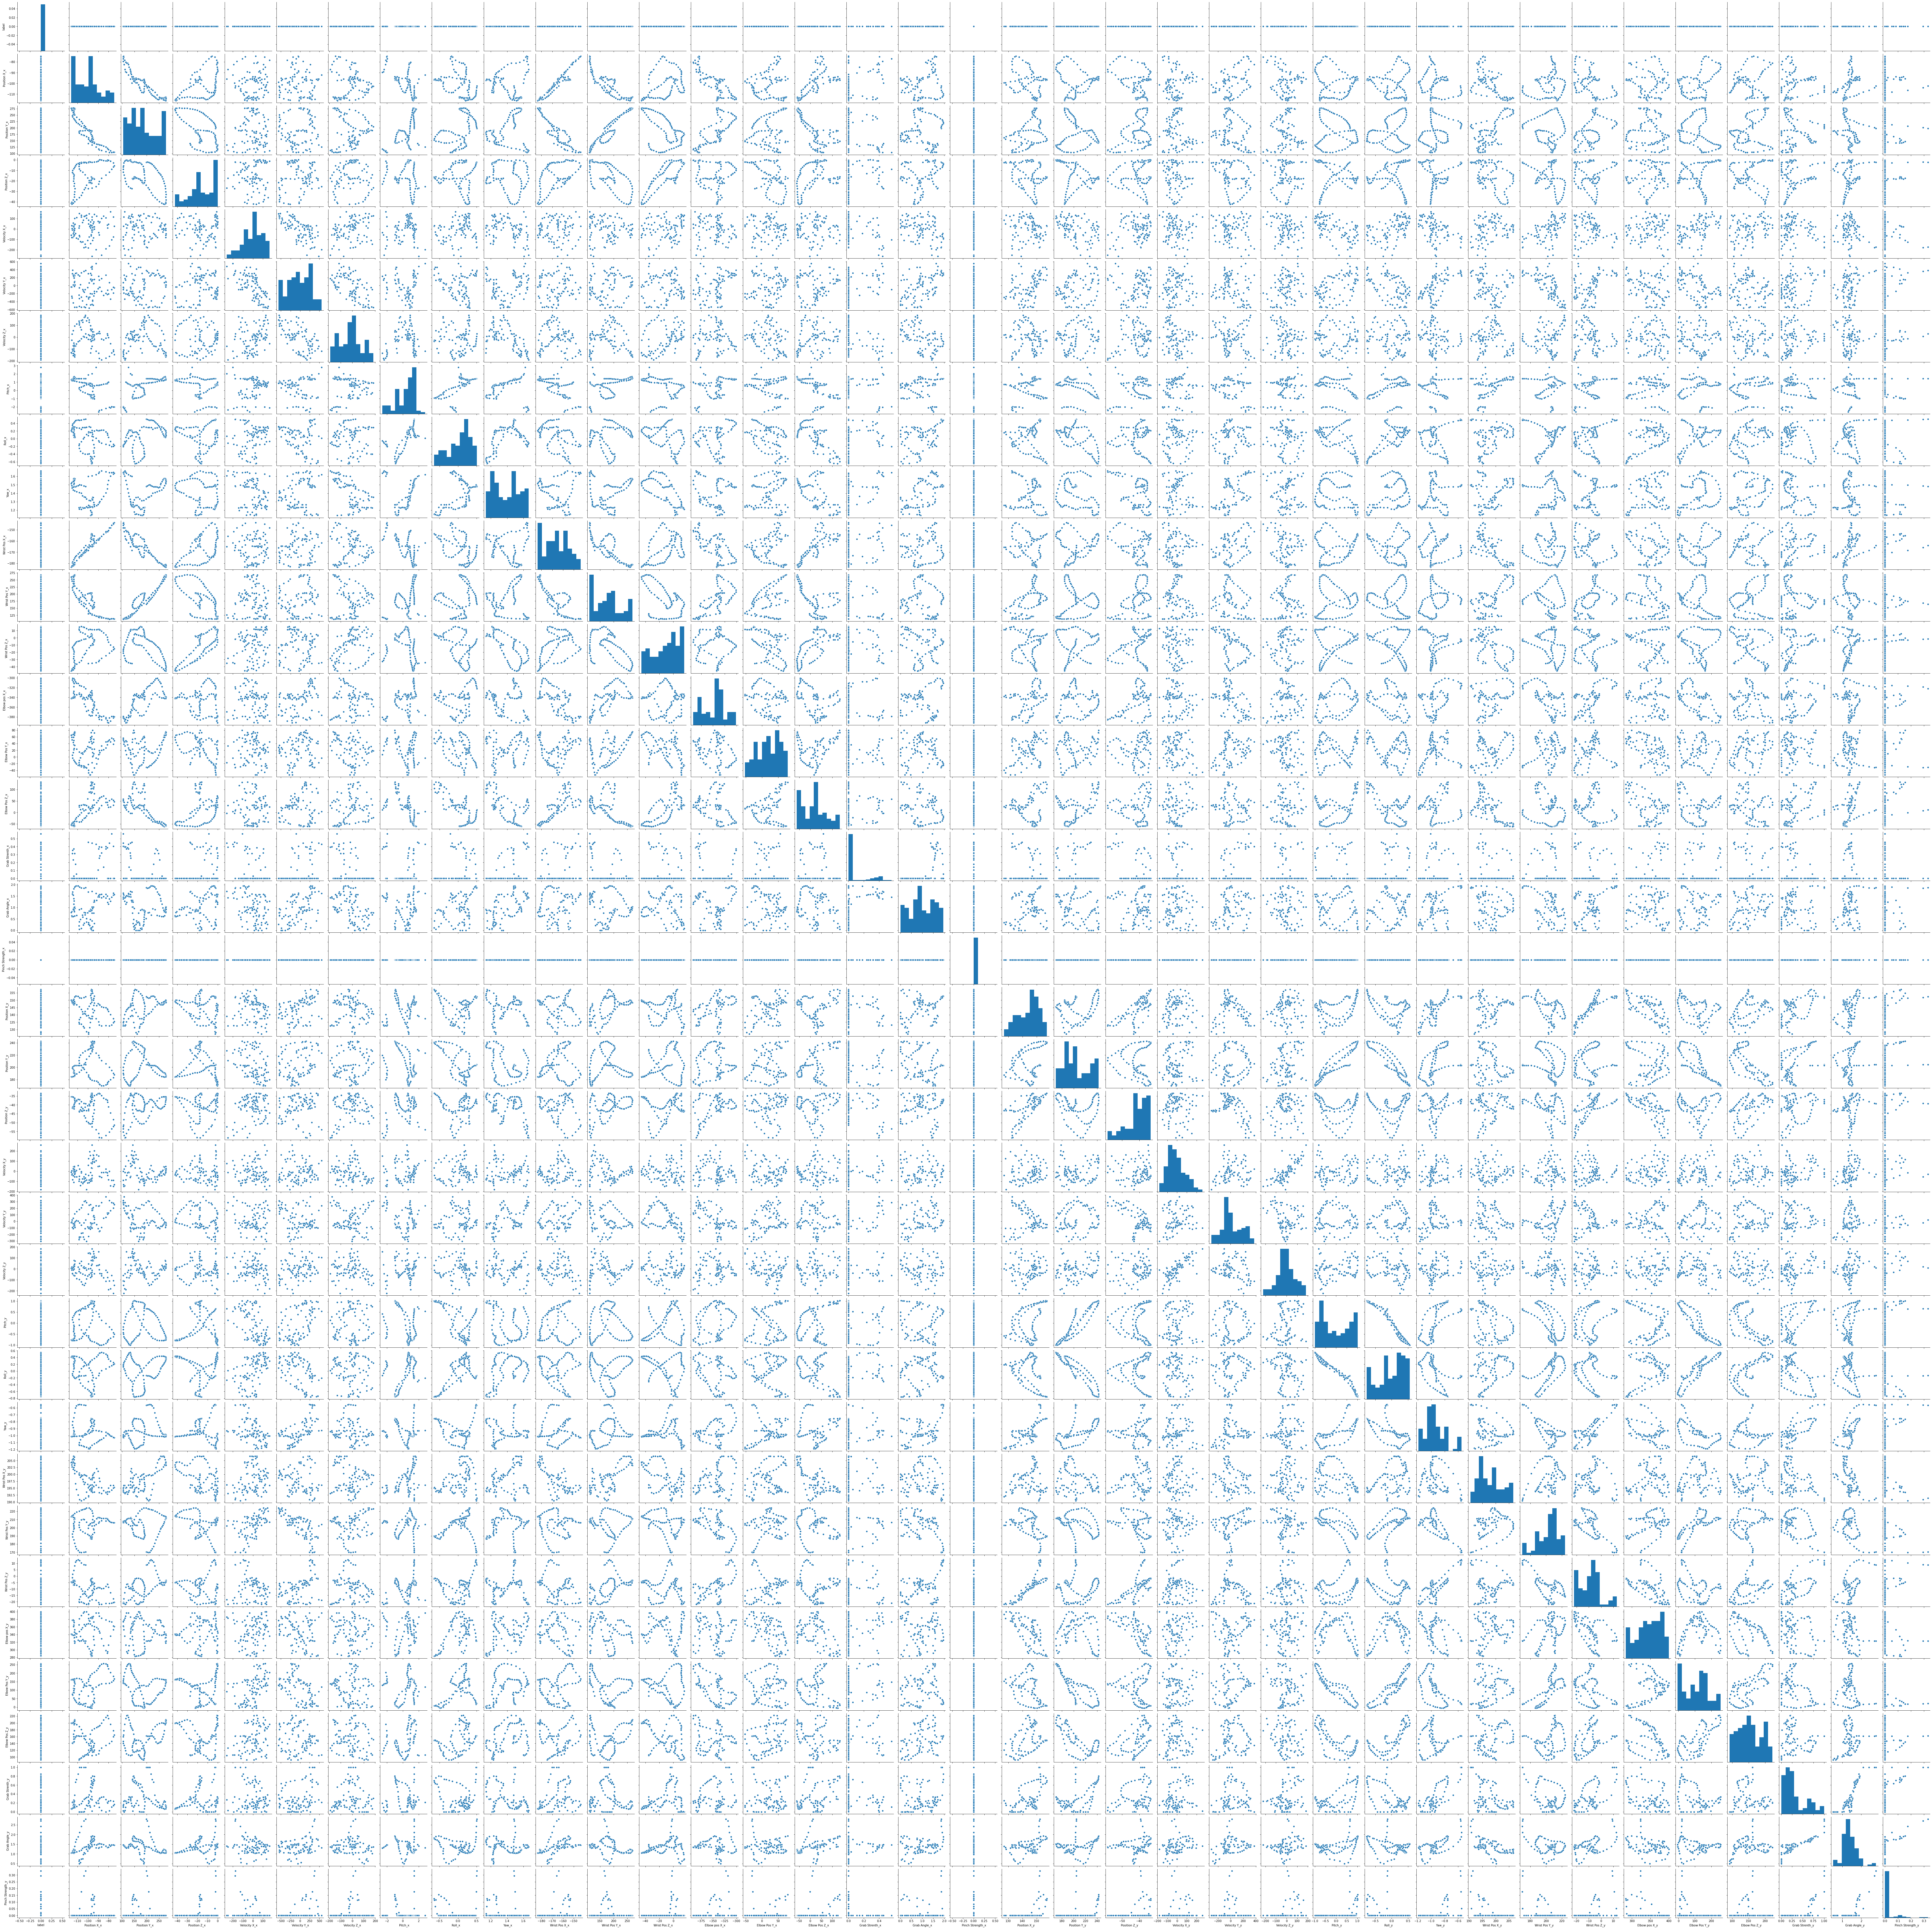

In [18]:
import seaborn as sns 
sns.pairplot(X_train_whole[:100])

#### Preparing test dataset

In [19]:
#Itiel
Itiel_Spontan, Itiel_Sync, Itiel_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Itiel Lab\Itiel636770941638547912Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Itiel Lab\Itiel636770942529041679Alone.csv")

#Mor
Mor_Spontan, Mor_Sync, Mor_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Mor SHerman\Mor636771064635567065Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Mor SHerman\Mor636771065531910215Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Mor SHerman\Mor636771066407626524Alone.csv")

#Oded
Oded_Spontan, Oded_Sync, Oded_Alone = pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Oded Medina\Oded636754670490266956Spontan.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Oded Medina\Oded636754671560850581Sync.csv"), pd.read_csv(r"C:\Users\guyga\Project Semester B\HandPositions\Validation\Oded Medina\Oded636754669540564461Alone.csv")

In [20]:
list_sp_test = [Itiel_Spontan, Mor_Spontan, Oded_Spontan]
list_sy_test = [Itiel_Sync, Mor_Sync, Oded_Sync]
list_a_test = [Itiel_Alone, Mor_Alone, Oded_Alone]

In [21]:
for i in range(3):
    list_sp_test[i].insert(loc=1, column = 'label', value = 0)
    list_sy_test[i].insert(loc=1, column = 'label', value = 1)
    list_a_test[i].insert(loc=1, column = 'label', value = 2)

In [22]:
df_sp_test = pd.concat(create_df(list_sp_test))
df_sy_test = pd.concat(create_df(list_sy_test))
df_a_test = pd.concat(create_df_no_right(list_a_test))

In [23]:
df_sp_test.drop(droplist, axis=1, inplace=True)
df_sy_test.drop(droplist, axis=1, inplace=True)
df_a_test.drop(droplist_a, axis=1, inplace=True)

In [24]:
df_sp_test = df_sp_test.rename(columns = {"label_x":"label"})
df_sy_test = df_sy_test.rename(columns = {"label_x":"label"})

In [25]:
X_test_final = pd.concat([df_sp_test, df_sy_test, df_a_test], axis=0)
X_test_final = X_test_final.fillna(0)
X_test_final

label   Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0         0     -159.34530       203.1198       28.14956       1.868645   
1         0     -158.83040       202.9772       27.92949      41.384500   
2         0     -158.15580       202.7527       27.74698      47.141900   
3         0     -157.66540       202.5851       27.59054      56.519950   
4         0     -156.93110       202.3219       27.28152      35.349590   
...     ...            ...            ...            ...            ...   
2245      2      -62.14733       282.7198       62.15659     -90.006310   
2246      2      -64.38816       276.7341       60.39418     -51.703520   
2247      2      -65.33954       272.7191       59.17199     -27.796780   
2248      2      -67.02361       268.6757       57.91473     -31.616060   
2249      2      -67.49754       266.6283       57.18670     -14.965310   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  ...  \
0          37.01694      -11.42015  0.417738  2.161856  0.904842  ...   
1         -18.25130      -16.37026  0.394822  2.177706  0.898561  ...   
2         -20.65330      -14.79889  0.381070  2.201845  0.892868  ...   
3         -19.32211      -18.02981  0.377304  2.210599  0.890015  ...   
4         -13.85674      -14.19096  0.374588  2.224526  0.888334  ...   
...             ...            ...       ...       ...       ...  ...   
2245     -129.34680      -50.10587  1.075124  0.628785  0.853153  ...   
2246     -204.26430      -56.99268  1.034970  0.630722  0.791928  ...   
2247     -111.88810      -42.74572  1.020301  0.653336  0.758811  ...   
2248      -76.33112      -24.73411  1.014676  0.699469  0.730031  ...   
2249      -64.54613      -20.44822  1.001481  0.712398  0.719895  ...   

         Yaw_y   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0    -0.336620       164.35730        159.7095        25.43896   
1    -0.344162       165.66160        161.6832        26.45107   
2    -0.347686       167.09130        164.0732        27.55513   
3    -0.345722       167.31900        164.5545        27.96732   
4    -0.345081       167.76230        165.5259        28.97613   
...        ...             ...             ...             ...   
2245 -0.312848        22.30525        109.4275       270.77560   
2246 -0.322651        22.59836        111.4653       270.15270   
2247 -0.321830        22.73621        112.6763       269.76830   
2248 -0.310634        23.00755        115.4107       268.98050   
2249 -0.304922        23.54782        117.8497       266.47700   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           243.8085       -34.59677        163.7492              0.0   
1           247.7545       -32.00053        164.0902              0.0   
2           251.2191       -29.17511        164.5763              0.0   
3           252.6738       -28.27396        164.8209              0.0   
4           254.7319       -26.80494        165.5129              0.0   
...              ...             ...             ...              ...   
2245        133.5410        51.02776        515.0112              0.0   
2246        130.5906        57.01611        516.7125              0.0   
2247        129.0984        60.04330        517.4126              0.0   
2248        126.1909        65.98954        518.5931              0.0   
2249        122.8252        72.20640        518.3478              0.0   

       Grab Angle_y   Pinch Strength_y  
0          0.000000                0.0  
1          0.000000                0.0  
2          0.000000                0.0  
3          0.000000                0.0  
4          0.000000                0.0  
...             ...                ...  
2245       0.119834                0.0  
2246       0.148430                0.0  
2247       0.135948                0.0  
2248       0.145752                0.0  
2249       0.105007                0.0  

[31410 rows x 37 columns]

#### Training

In [26]:
X = X_train_whole.drop(["label"], axis=1)
y = X_train_whole["label"]

y.unique()

array([0, 1, 2], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 2.98533045, -1.01211414,  0.01806137, ..., -0.30167539,
        -0.32928274, -0.28530025],
       [ 1.12842563, -0.4365018 , -0.93890985, ..., -0.30167539,
         0.17502535, -0.28530025],
       [ 0.4458505 , -0.84290046, -0.0889477 , ..., -0.30167539,
        -0.75461982, -0.28530025],
       ...,
       [-0.38447153, -0.25452563, -1.94510022, ..., -0.30167539,
        -0.575019  , -0.28530025],
       [ 0.73418319, -1.12762297, -0.62143754, ...,  0.75936041,
         1.19012624, -0.28530025],
       [ 0.27070162, -1.36785146,  0.99266617, ..., -0.30167539,
        -0.3364151 , -0.28530025]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

check = []
preds = []
for k in range(5, 25):
    clf1 = KNeighborsClassifier(n_neighbors = k)
    clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    preds.append(y_pred1)
    check.append(accuracy_score(y_test,y_pred1))
    
print(check.index(max(check)) + 5)
y_pred1 = preds[check.index(max(check))]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result2)

5
Confusion Matrix:
[[10306    22     3]
 [   29 10254     2]
 [    2     0 11247]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10331
           1       1.00      1.00      1.00     10285
           2       1.00      1.00      1.00     11249

    accuracy                           1.00     31865
   macro avg       1.00      1.00      1.00     31865
weighted avg       1.00      1.00      1.00     31865

Accuracy: 0.9981798211203515


#### KNN got an f1 score of 99%. Let's try now SGDClassifier.

In [33]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(random_state = 42)
clf2.fit(X_train, y_train)

cross_val_score(clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.88899649, 0.89016665, 0.8912561 ])

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

y_pred2 = cross_val_predict(clf2, X_train, y_train, cv=3)

confusion_matrix(y_train, y_pred2)

array([[21714,  2369,    72],
       [ 5615, 18159,     6],
       [   69,    37, 26308]], dtype=int64)

#### SGDC got 89%. Let's try now PCA.

In [36]:
from sklearn.decomposition import PCA

clf3 = SGDClassifier(random_state = 42)

maxn = 0
maxi = 0

i = 1
while i < 20:
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_pca=pca.transform(X_train)
    clf3.fit(X_pca, y_train)
    current = cross_val_score(clf3, X_pca, y_train, cv=3, scoring="accuracy").max()
    if maxn <= current:
        maxn = current
        maxi = i
    i += 1

print(maxn)
print(maxi)

0.853811080175927
19


#### Reduced to 17 components, got an accuracy of 85%. Let's use XGBoost on it.

In [37]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_pca)
print(explained_variance_score(predictions,y_train))

0.9548441712922718


#### Accuracy of 95.5% with only 17 components.